In [1]:
from copy import deepcopy
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

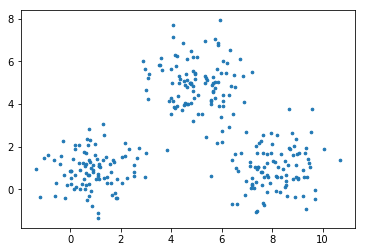

In [2]:
c_1 = np.array([1,1])
c_2 = np.array([5,5])
c_3 = np.array([8,1])



d_1 = np.random.randn(100,2)+c_1
d_2 = np.random.randn(100,2)+c_2
d_3 = np.random.randn(100,2)+c_3

data = np.concatenate((d_1, d_2, d_3), axis =0)
plt.scatter(data[:,0], data[:,1], s=7)

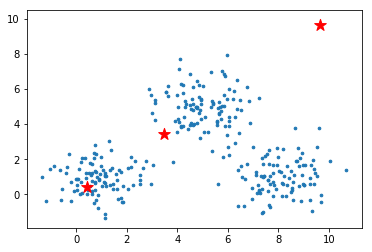

In [3]:
k = 3
n = data.shape[0]
c = data.shape[1]
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,0], marker='*', c='r',s=150)

In [4]:
centers_old = np.zeros(centers.shape)
centers_new = deepcopy(centers)
data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

while error != 0:                       
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
        clusters = np.argmin(distances, axis = 1)  
        centers_old = deepcopy(centers_new)
        for i in range(k):
               centers_new[i] = np.mean(data[clusters == i], axis=0) 
        error = np.linalg.norm(centers_new - centers_old)
centers_new

array([[0.8327743 , 0.87269072],
       [4.95552736, 4.58792765],
       [8.17073164, 1.22364795]])

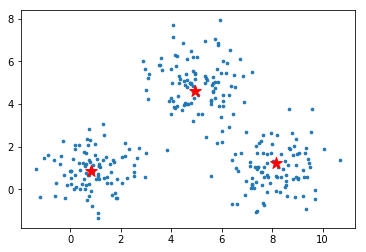

In [5]:
plt.scatter(data[:,0],data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='r', s=150)